In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


## Load and examine the data

We work with a (synthetic) dataset of insurance charges, to see if we can understand why some customers pay more than others.

In [2]:
# Path of the file to read
insurance_filepath = "../data/insurance.csv"

# Read the file into a variable insurance_data
insurance_data = pd.read_csv(insurance_filepath)

insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Scatter Plots

To create a simple scatter plot, we use the ```sns.scatterplot``` command and specify the values for:
* the horizontal x-axis (```x=insurance_data['bmi']```), and
* the vertical y-axis (```y=insurance_data['charges']```).

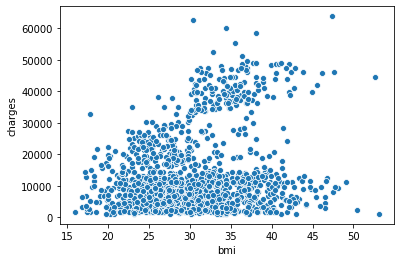

In [3]:
sns.scatterplot(x=insurance_data['bmi'], y=insurance_data['charges'])

The scatterplot above suggests that body mass index (BMI) and insurances are **positively correlated**, where customers with higher BMI typically also tend to pay more in insurance costs. *(This pattern makes sense, since high BMI is typically associated with high risk of chronic disease)*

### Scatter plot with Regression Line
To double-check the strength of this relationship, we add a **regression line**, or the line that best fits the data.
We do this by changing the command to ```sns.regplot```

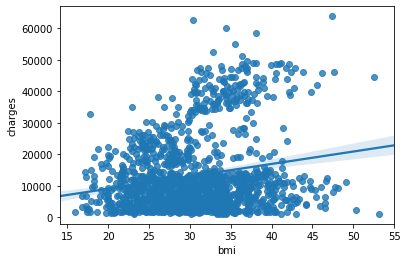

In [4]:
sns.regplot(x=insurance_data['bmi'], y=insurance_data['charges'])

### Color-coded scatter plots

We can use scatter plots to display the relationships between three variables! One way of doing this is by color-coding the points.

For instance, to understand how smoking affects the relationship between BMI and insurance costs, we can color-code the points by ```'smoker'```, and plot the other two columns (```'bmi'```, ```'charges'```) on the axes.

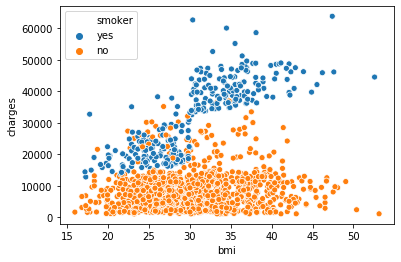

In [5]:
sns.scatterplot(x=insurance_data['bmi'], y=insurance_data['charges'], hue=insurance_data['smoker'])

This scatter plot shows that while nonsmokers tend to pay slightly more with increasing BMI, smokers pay MUCH more.

### Color-Coded Scatter Plots with Regression Lines
To further emphasize this face, we can use the ```sns.lmplot``` command to add two regression lines, corresponding to smokers and nonsmokers. *(The regression line for smokers has a much steeper slope, relative to the line for nonsmokers.)*

The ```sns.lmplot``` works slightly different:
* Instead of setting ```x=insurance_data['bmi']``` to select the ```'bmi'``` column in ```insuracne_data```, we set ```x="bmi"``` to specify the name of the column.
* Similarly, ```y="charges"``` and ```hue="smoker"``` also contain the names of the column.
* We specify the dataset with ```data=insurance_data```.

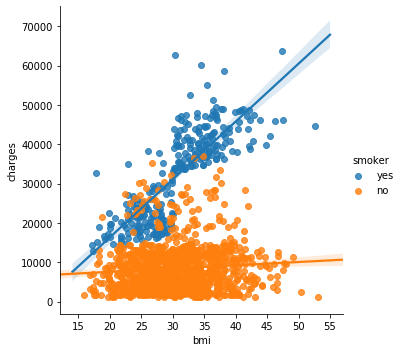

In [6]:
sns.lmplot(x="bmi", y="charges", hue="smoker", data=insurance_data)

### Cluster Plots
We can adapt the design of the scatter plot to feature a categorical variable like ("smoker") on one of the main axes. We'll refer to this plot as a **categorical scatter plot**m and we build it with the ```sns.swarmplot``` command.

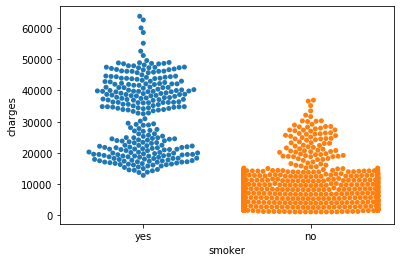

In [7]:
sns.swarmplot(x=insurance_data['smoker'],
              y=insurance_data['charges'])

The above plot shows us that:
* on average, non-smokers are charged less than smokers, and
* the customers who pay the most are smokers; whereas the customers who pay the least are non-smokers

## Scenario
Our goal is to write a report that a candy producer company can use to guide the design of its next product. 
We have a candy dataset that contains results from a survey to crowdsource favourite candies.

The dataset contains 83 rows, where each corresponds to a different candy bar.  There are 13 columns:
- `'competitorname'` contains the name of the candy bar. 
- the next **9** columns (from `'chocolate'` to `'pluribus'`) describe the candy.  For instance, rows with chocolate candies have `"Yes"` in the `'chocolate'` column (and candies without chocolate have `"No"` in the same column).
- `'sugarpercent'` provides some indication of the amount of sugar, where higher values signify higher sugar content.
- `'pricepercent'` shows the price per unit, relative to the other candies in the dataset.
- `'winpercent'` is calculated from the survey results; higher values indicate that the candy was more popular with survey respondents.

In [8]:
# Path of the file to read
candy_filepath = "../data/candy.csv"

# Fill in the line below to read the file into a variable candy_data
candy_data = pd.read_csv(candy_filepath, index_col="id")

candy_data.head()


,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
id,,,,,,,,,,,,,
0,100 Grand,Yes,No,Yes,No,No,Yes,No,Yes,No,0.732,0.860,66.971725
1,3 Musketeers,Yes,No,No,No,Yes,No,No,Yes,No,0.604,0.511,67.602936
2,Air Heads,No,Yes,No,No,No,No,No,No,No,0.906,0.511,52.341465
3,Almond Joy,Yes,No,No,Yes,No,No,No,Yes,No,0.465,0.767,50.347546
4,Baby Ruth,Yes,No,Yes,Yes,Yes,No,No,Yes,No,0.604,0.767,56.914547


### The role of sugar

Do people tend to prefer candies with higher sugar content?

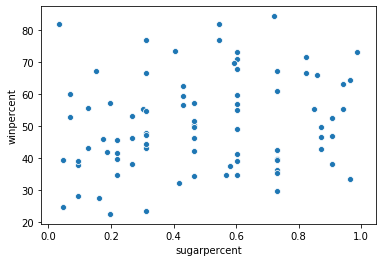

In [9]:
# Scatter plot showing the relationship between 'sugarpercent' and 'winpercent'
sns.scatterplot(x=candy_data['sugarpercent'], y=candy_data['winpercent'])

The scatter plot does not show a strong correlation between the two variables. Since there is no clear relationship between the two variables, this tells us that sugar content does not play a strong role in candy popularity.

Let's try to plot the regression line.

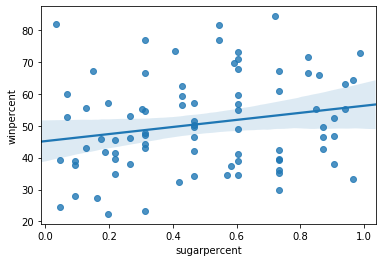

In [10]:
# Scatter plot w/ regression line showing the relationship between 'sugarpercent' and 'winpercent'
sns.regplot(x=candy_data['sugarpercent'], y=candy_data['winpercent'])

Since the regression line has a slightly positive slope, this tells us that there is a slightly positive correlation between `'winpercent'` and `'sugarpercent'`. Thus, people have a slight preference for candies containing relatively more sugar.

### Chocolate

We now plot the relationship between `'pricepercent'` and `'winpercent'` and use the `'chocolate'` column to color-code the points.

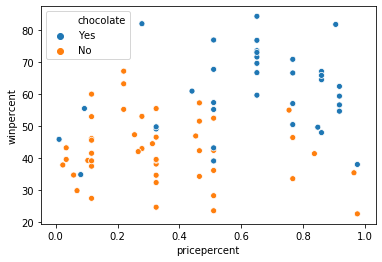

In [11]:
# Scatter plot showing the relationship between 'pricepercent', 'winpercent', and 'chocolate'
sns.scatterplot(x=candy_data['pricepercent'], y=candy_data['winpercent'], hue=candy_data['chocolate'])

### Investigating chocolate

We create the same scatter plot but now with two regression lines, corresponding to 
(1) chocolate candies and (2) candies without chocolate

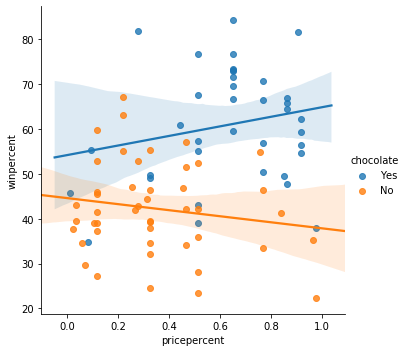

In [12]:
# Color-coded scatter plot w/ regression lines
sns.lmplot(x="pricepercent", y="winpercent", hue="chocolate", data=candy_data)

Regression line for chocolate candies: Since this line has a positive slope, we can say that more expensive chocolate candies tend to be more populat (than relatively cheaper chocolate candies). 

Likewise, since the regression line for candies without chocolate has a negative slope, we can say that if candies don't contain chocolate, they tend to be more popular when they are cheaper.

One important note, however, is that the dataset is quite small -- so we shouldn't invest too much trust in these patterns! To inspire more confidence in the results, we should add more candies to the dataset.

### Categorical scatter plot

We now create a categorical scatter plot to highlight the relationship between `'chocolate'` and `'winpercent'`. 

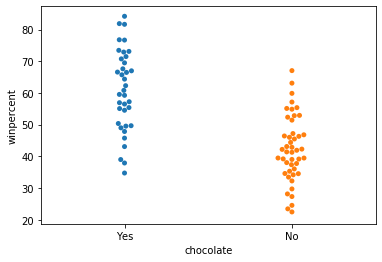

In [13]:
# Scatter plot showing the relationship between 'chocolate' and 'winpercent'
sns.swarmplot(x=candy_data['chocolate'],
              y=candy_data['winpercent'])